<a href="https://colab.research.google.com/github/Lexie-v2/Goggle-CO/blob/main/Lab2___Colab__Vera%2CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vanesa Vera

INTELIGENCIA ARTIFICIAL
#LAB 2: REGRESIÓN LINEAL

En esta sesión implementaremos la regresión lineal simple y multiple, para esto haremos uso del "Boston house prices dataset"

El "Boston house prices dataset" contiene información sobre 506 barrios en Boston, Massachusetts, y está compuesto por 13 características (variables independientes) que describen aspectos socioeconómicos, demográficos y geográficos de cada barrio. La variable dependiente es el precio medio de las viviendas en miles de dólares.

**Caracteristicas**  

    :Number of Instances: 506
    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.
    :Attribute Information (in order):
        - CRIM     Tasa de crimen per cápita por barrio.
        - ZN       Proporción de terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados.
        - INDUS    Proporción de acres destinados a negocios no minoristas por barrio.
        - CHAS     Variable dummy del río Charles (= 1 si el área limita con el río; 0 en caso contrario).
        - NOX      Concentración de óxidos de nitrógeno (partes por 10 millones).
        - RM       Número promedio de habitaciones por vivienda.
        - AGE      Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
        - DIS      Distancias ponderadas a cinco centros de empleo de Boston.
        - RAD      Índice de accesibilidad a carreteras radiales.
        - TAX      Tasa de impuestos a la propiedad con valor completo por cada $10,000.
        - PTRATIO  Relación alumno-maestro por barrio.
        - B        (1000(Bk - 0.63)^2), donde (Bk) es la proporción de residentes afroamericanos por barrio.
        - LSTAT    Porcentaje de población con bajo estatus socioeconómico.
        - MEDV     Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares.

##1. Análisis exploratorio inicial.

Primero vamos a modelar la relación existente entre las variables RM (Número medio de habitaciones) y MEDV (Valor medio de la vivienda).

**Demostraremos la existencia de alguna relación entre la variable RM (Número promedio de habitaciones) y MEDV (Valor medio de las viviendas)**

Visualización con Scatter Plot

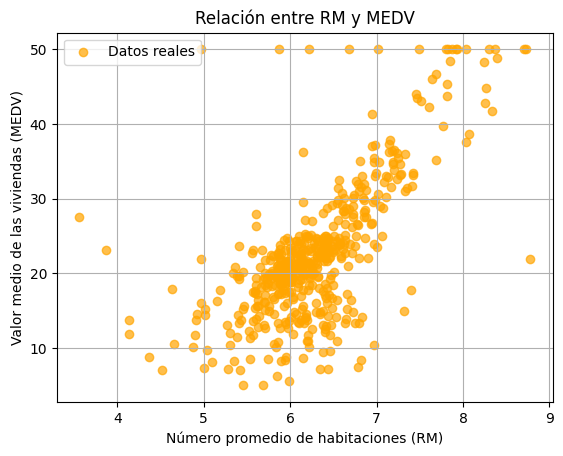

Correlación entre RM y MEDV: 0.6953599470715393
Coeficiente (pendiente): 9.10210898118031
Intercepto: -34.67062077643857


In [20]:
# --- Importar las bibliotecas necesarias ---
# pandas: Para manipulación y análisis de datos tabulares (organizados en filas y columnas).
# numpy: Para operaciones matemáticas y manejo de arrays.
# matplotlib: Para generar gráficos como scatter plots e histogramas.
# sklearn: Para entrenar y evaluar el modelo de regresión lineal.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# --- Cargar el Boston Housing Dataset ---
# URL donde se encuentra el dataset.
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# Leer los datos desde la URL
# sep="\s+": Indica que los valores están separados por espacios.
# skiprows=22: Omite las primeras 22 filas (descripciones y metadatos).
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Procesar los datos
# Combinar las filas para crear una matriz completa de datos.
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])  # Características
target = raw_df.values[1::2, 2]  # Variable objetivo (MEDV)

# Crear un DataFrame organizado con las características y la variable objetivo
columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
df = pd.DataFrame(data, columns=columns)
df['MEDV'] = target  # Agregar la variable dependiente

# --- Relación entre RM y MEDV ---
# Graficar RM (número promedio de habitaciones) vs MEDV (valor medio de las viviendas)
plt.scatter(df['RM'], df['MEDV'], alpha=0.7, color='orange', label='Datos reales')
plt.xlabel("Número promedio de habitaciones (RM)")
plt.ylabel("Valor medio de las viviendas (MEDV)")
plt.title("Relación entre RM y MEDV")
plt.grid(True)
plt.legend()
plt.show()

# Calcular la correlación entre RM y MEDV
correlation = df['RM'].corr(df['MEDV'])
print(f"Correlación entre RM y MEDV: {correlation}")

# --- Modelar la relación: Regresión Lineal ---
# Seleccionar las variables independientes y dependientes
X = df[['RM']]  # Variable independiente (número promedio de habitaciones)
y = df['MEDV']  # Variable dependiente (valor medio de las viviendas)

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Coeficientes del modelo
print(f"Coeficiente (pendiente): {model.coef_[0]}")
print(f"Intercepto: {model.intercept_}")

# Generar predicciones usando el modelo ajustado
y_pred = model.predict(X)

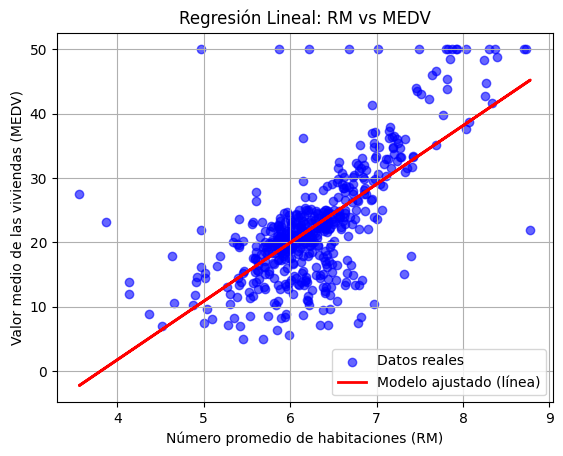

Coeficiente de determinación R^2: 0.48352545599133423
El precio medio de las viviendas con RM entre 5 y 6 es: 17.4873417721519


In [11]:
# Visualizar la línea de regresión ajustada junto con los datos reales
plt.scatter(X, y, color='blue', alpha=0.6, label='Datos reales')
plt.plot(X, y_pred, color='red', linewidth=2, label='Modelo ajustado (línea)')
plt.xlabel("Número promedio de habitaciones (RM)")
plt.ylabel("Valor medio de las viviendas (MEDV)")
plt.title("Regresión Lineal: RM vs MEDV")
plt.legend()
plt.grid(True)
plt.show()

# --- Evaluar el rendimiento del modelo ---
# Calcular el coeficiente de determinación R^2
r2 = r2_score(y, y_pred)
print(f"Coeficiente de determinación R^2: {r2}")

# --- Precio medio con RM entre 5 y 6 ---
# Filtrar los datos donde RM esté entre 5 y 6 usando np.logical_and()
filtered_data = df[np.logical_and(df['RM'] >= 5, df['RM'] <= 6)]

# Calcular el precio medio para el rango filtrado
mean_price = filtered_data['MEDV'].mean()
print(f"El precio medio de las viviendas con RM entre 5 y 6 es: {mean_price}")


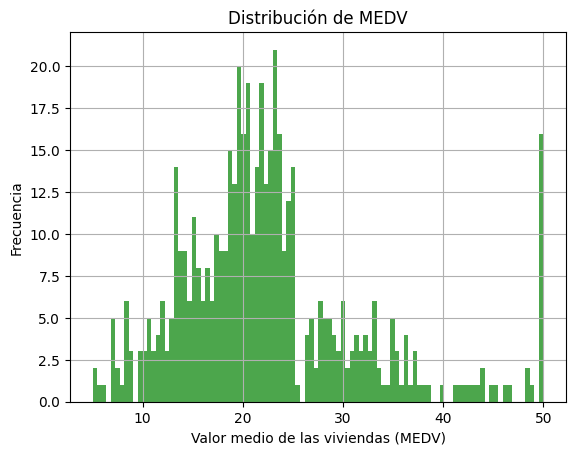

In [12]:
# --- Identificar anomalías en la distribución de MEDV ---
# Generar un histograma para MEDV con un número elevado de bins
plt.hist(df['MEDV'], bins=100, color='green', alpha=0.7)
plt.xlabel("Valor medio de las viviendas (MEDV)")
plt.ylabel("Frecuencia")
plt.title("Distribución de MEDV")
plt.grid(True)
plt.show()

## 1. Regresión Lineal simple

## 2. Regresión Lineal Multiple